In [1]:
%matplotlib inline
import tensorflow as tf
#https://ischlag.github.io/2016/06/04/how-to-use-tensorboard/

In [2]:
a = tf.placeholder("float")
b = tf.placeholder("float")

y = tf.mul(a,b)


sess = tf.Session()


print sess.run(y, feed_dict={a:3, b:3})


9.0


Chapter 2 - Linear Regression

In [21]:
import numpy as np
num_points = 1000
vectors_set =[]
for i in xrange(num_points):
    x1 = np.random.normal(0.0,0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0,0.03)
    vectors_set.append([x1,y1])

In [22]:
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

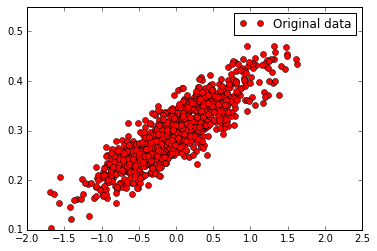

In [120]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'ro', label = 'Original data')
plt.legend()
plt.show()

In [150]:
tf.reset_default_graph()
with tf.name_scope('input'):
    W = tf.Variable(tf.random_uniform([1],-1.0, 1.0), name='W')
    #this will make a very bad model with 8 iteractions..not enough to learn
    #W = tf.Variable([1.0])
    b = tf.Variable(tf.zeros([1]), name = 'bias')
y = W * x_data +b

loss = tf.reduce_mean(tf.square(y-y_data))

optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [151]:
writer = tf.train.SummaryWriter('/tmp/tensorflow', graph=tf.get_default_graph())

0 [-0.02772383] [ 0.29739946] 0.00572279
1 [ 0.01109703] [ 0.29781163] 0.00317397
2 [ 0.03792451] [ 0.29811457] 0.00195674
3 [ 0.056464] [ 0.2983239] 0.00137542
4 [ 0.06927598] [ 0.29846859] 0.00109781
5 [ 0.07812987] [ 0.29856858] 0.000965224
6 [ 0.08424847] [ 0.29863766] 0.000901907
7 [ 0.08847681] [ 0.2986854] 0.000871669


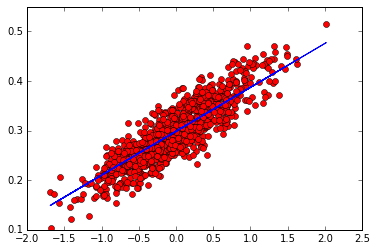

In [152]:
for step in xrange(8):
    sess.run(train)    
    print step, sess.run(W), sess.run(b), sess.run(loss)
    
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, sess.run(W)*x_data+sess.run(b))
plt.legend()
plt.show()

Shapes

In [155]:
vectors =tf.constant(vectors_set)

In [156]:
tf.shape(vectors)

<tf.Tensor 'Shape_1:0' shape=(2,) dtype=int32>

In [157]:
extended_vectors = tf.expand_dims(vectors,0)

In [160]:
tf.shape(extended_vectors)

<tf.Tensor 'Shape_3:0' shape=(3,) dtype=int32>

In [161]:
print extended_vectors.get_shape()

(1, 1000, 2)
